## Life Cycle of a Machine Learning Project

### Understanding the Problem Statement

* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-processing
* Model Training
* Choose best model


### Problem Statement

This dataset comprises of features for a motor insurance claim, our job is to check whether the claim made was actually Fraud or not. Its a classification problem statement.

### 1. Data Collection

In [1]:
## Import required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline



In [2]:
## load the data as pandas dataframe

df = pd.read_csv("data/insurance_claims.csv")

In [3]:
## Show top 5 records

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
## Shape of the data

df.shape

(1000, 40)

We have 1000 records and 40 columns in the dataset

In [5]:
## Summary of the numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [6]:
## Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Observation - 

There are no values in column `_c39` we can remove it, we can see some missing values in `authorities_contacted` as well

In [7]:
## Let's create a new copy without _c39

df = df.drop(columns=['_c39'], axis=1)

In [8]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


We can drop `policy_number` , `policy_bind_date` as well as it does'nt seem any relevance

In [9]:
df = df.drop(columns=['policy_number', 'policy_bind_date'], axis=1)

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


In [10]:
## define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))

print("----------------------------------------------------------------------------------")

print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 17 numerical features: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
----------------------------------------------------------------------------------
We have 20 categorical features: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [11]:
## proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("----------------------------------------")

policy_state
OH    35.2
IL    33.8
IN    31.0
Name: proportion, dtype: float64
----------------------------------------
policy_csl
250/500     35.1
100/300     34.9
500/1000    30.0
Name: proportion, dtype: float64
----------------------------------------
insured_sex
FEMALE    53.7
MALE      46.3
Name: proportion, dtype: float64
----------------------------------------
insured_education_level
JD             16.1
High School    16.0
Associate      14.5
MD             14.4
Masters        14.3
PhD            12.5
College        12.2
Name: proportion, dtype: float64
----------------------------------------
insured_occupation
machine-op-inspct    9.3
prof-specialty       8.5
tech-support         7.8
sales                7.6
exec-managerial      7.6
craft-repair         7.4
transport-moving     7.2
other-service        7.1
priv-house-serv      7.1
armed-forces         6.9
adm-clerical         6.5
protective-serv      6.3
handlers-cleaners    5.4
farming-fishing      5.3
Name: proportion, dty

In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [13]:
## Checking the duplicate columns
print("Number of duplicates: ", df.duplicated().sum())
print("Unique values per column:")
df.nunique()

Number of duplicates:  0
Unique values per column:


months_as_customer              391
age                              46
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                   

There are no duplicate records in the dataset

In [14]:
## Checking for null values

df.isnull().sum()

months_as_customer              0
age                             0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_am

There are 91 missing values in authorities_contacted

### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix "uni" means "one", The purpose of univariate analysis is to understand the distribution of values for a single variable

### Univariate analysis of numerical features

In [15]:
def visualize_numerical_features(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

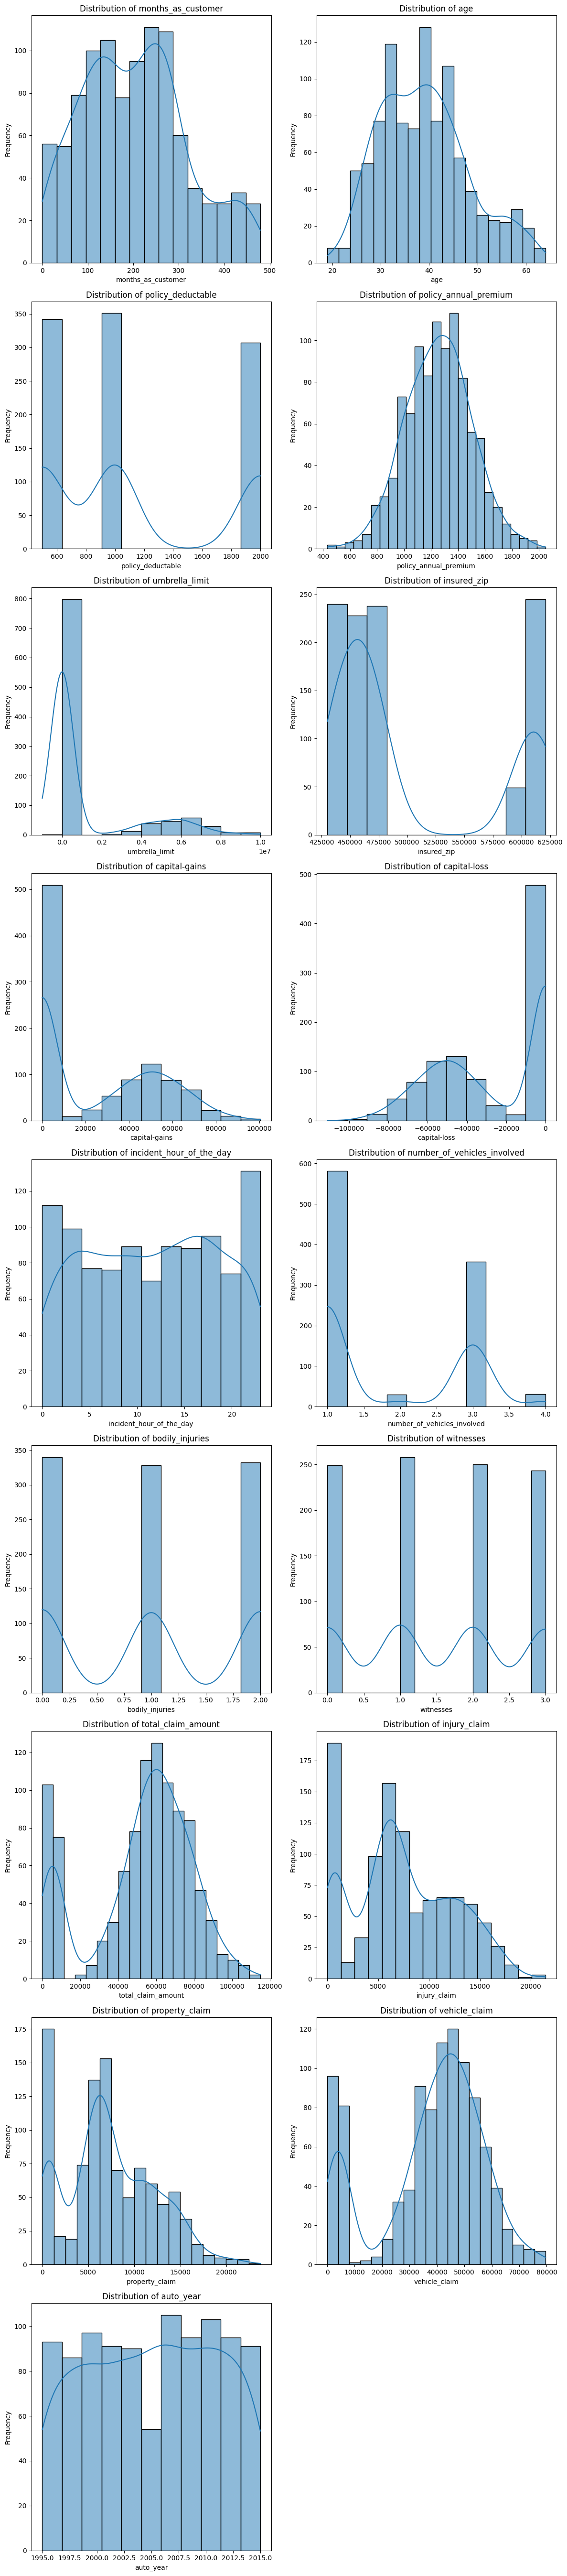

In [16]:
visualize_numerical_features(df)

### Report

* most of the features follows normal distribution, but also has outliers

In [17]:
## Categorical features

def visualize_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category'])

    cat_cols = len(categorical_features.columns)
    cat_rows = (cat_cols // 2) + (cat_cols % 2)

    fig, axes = plt.subplots(cat_rows, 2, figsize=(12, 6*cat_rows))

    for i, feature in enumerate(categorical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Countplot of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide empty subplots if the number of features is odd
    if cat_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()

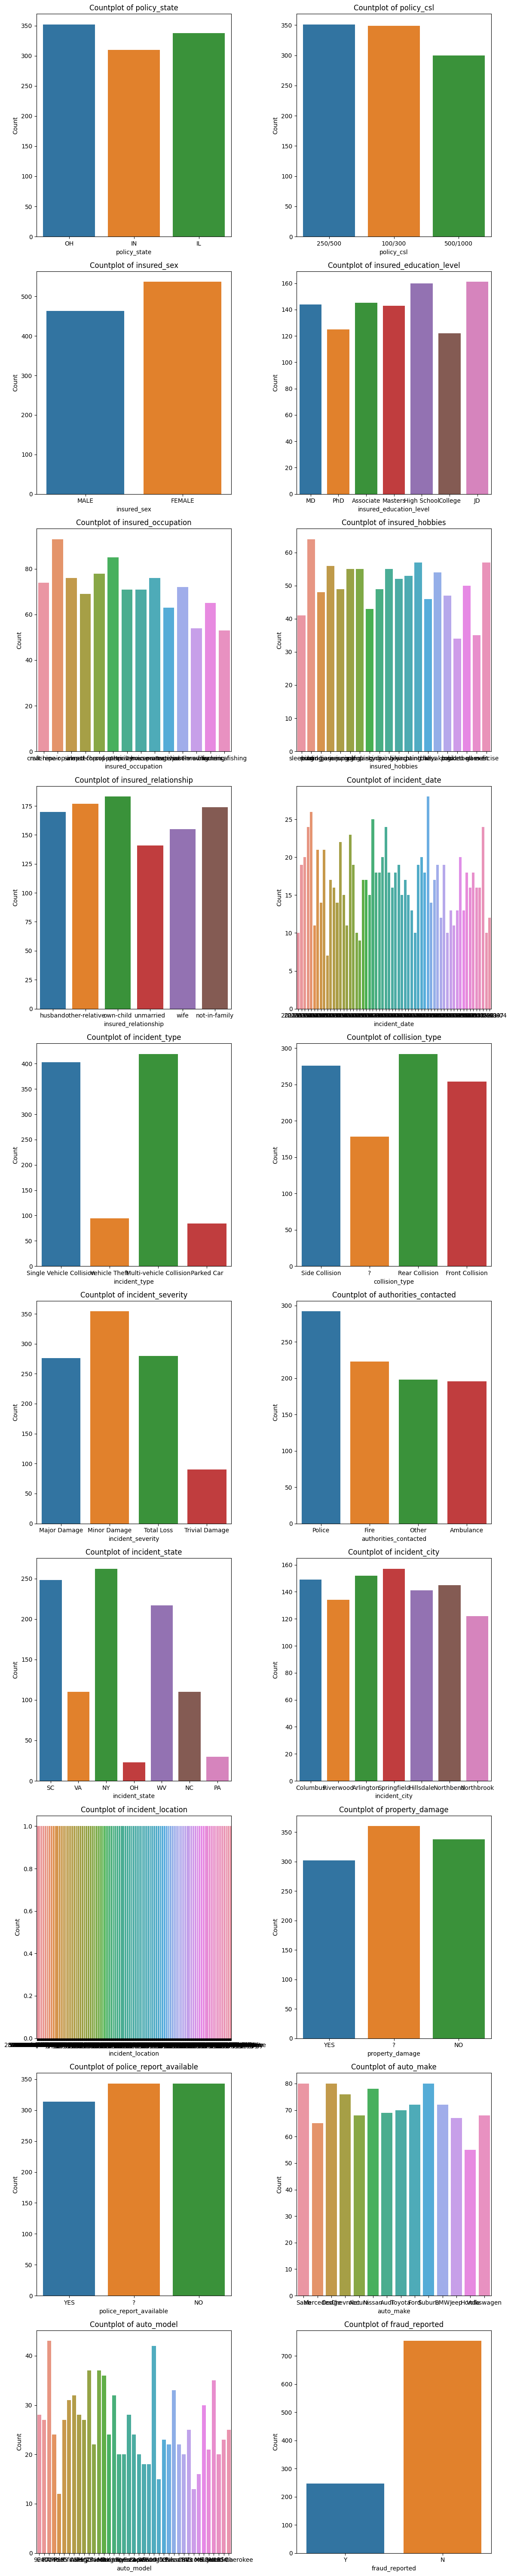

In [18]:
visualize_categorical_features(df)

### Report

* Most of the policies are from policy_state `OH`
* policy_csl has equal values in `250/500` and `100/300`
* More than 500 customers are Female
* education level has different categories, maximum are with `high_school` and 'JD`
* insured_occupation has categories 
* insured_hobbies have categories
* most of the customers are parents
* most of the incident type are of multi vehicle collision
* count of collision type is Rear collision
* most of the incidents happened are of Minor Damage
* customers mostly contacted the police
* most of the incidents happend in `NY`
* most of property_damage are unknown
* most of the police report available are also unknown
* more than 700+ customers claims are not reported False.

### Multivariate Analysis

Multivariate Analysis is the analysis of more than one variable

In [19]:
numeric_features

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [20]:
categorical_features

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [21]:
df_cat = df.select_dtypes(include="object").columns


In [22]:
df_cat

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [23]:
for col in df_cat:
    if df[col].nunique() <=20:
        display(pd.crosstab(df['fraud_reported'], df[col], normalize=True))

policy_state,IL,IN,OH
fraud_reported,,,
N,0.261,0.231,0.261
Y,0.077,0.079,0.091


policy_csl,100/300,250/500,500/1000
fraud_reported,,,
N,0.259,0.259,0.235
Y,0.090,0.092,0.065


insured_sex,FEMALE,MALE
fraud_reported,,
N,0.411,0.342
Y,0.126,0.121


insured_education_level,Associate,College,High School,JD,MD,Masters,PhD
fraud_reported,,,,,,,
N,0.111,0.090,0.124,0.119,0.106,0.111,0.092
Y,0.034,0.032,0.036,0.042,0.038,0.032,0.033


insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
fraud_reported,,,,,,,,,,,,,,
N,0.054,0.052,0.052,0.048,0.037,0.043,0.071,0.059,0.059,0.067,0.049,0.055,0.056,0.051
Y,0.011,0.017,0.022,0.028,0.016,0.011,0.022,0.012,0.012,0.018,0.014,0.021,0.022,0.021


insured_hobbies,base-jumping,basketball,board-games,bungie-jumping,camping,chess,cross-fit,dancing,exercise,golf,hiking,kayaking,movies,paintball,polo,reading,skydiving,sleeping,video-games,yachting
fraud_reported,,,,,,,,,,,,,,,,,,,,
N,0.036,0.028,0.034,0.047,0.050,0.008,0.009,0.038,0.046,0.049,0.040,0.049,0.046,0.044,0.034,0.047,0.038,0.033,0.04,0.037
Y,0.013,0.006,0.014,0.009,0.005,0.038,0.026,0.005,0.011,0.006,0.012,0.005,0.009,0.013,0.013,0.017,0.011,0.008,0.01,0.016


insured_relationship,husband,not-in-family,other-relative,own-child,unmarried,wife
fraud_reported,,,,,,
N,0.135,0.129,0.125,0.144,0.107,0.113
Y,0.035,0.045,0.052,0.039,0.034,0.042


incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
fraud_reported,,,,
N,0.305,0.076,0.286,0.086
Y,0.114,0.008,0.117,0.008


collision_type,?,Front Collision,Rear Collision,Side Collision
fraud_reported,,,,
N,0.162,0.184,0.201,0.206
Y,0.016,0.070,0.091,0.070


incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
fraud_reported,,,,
N,0.109,0.316,0.244,0.084
Y,0.167,0.038,0.036,0.006


authorities_contacted,Ambulance,Fire,Other,Police
fraud_reported,,,,
N,0.152915,0.179318,0.148515,0.254125
Y,0.062706,0.066007,0.069307,0.067107


incident_state,NC,NY,OH,PA,SC,VA,WV
fraud_reported,,,,,,,
N,0.076,0.204,0.013,0.022,0.175,0.085,0.178
Y,0.034,0.058,0.010,0.008,0.073,0.025,0.039


incident_city,Arlington,Columbus,Hillsdale,Northbend,Northbrook,Riverwood,Springfield
fraud_reported,,,,,,,
N,0.108,0.110,0.106,0.111,0.095,0.104,0.119
Y,0.044,0.039,0.035,0.034,0.027,0.030,0.038


property_damage,?,NO,YES
fraud_reported,,,
N,0.257,0.272,0.224
Y,0.103,0.066,0.078


police_report_available,?,NO,YES
fraud_reported,,,
N,0.254,0.257,0.242
Y,0.089,0.086,0.072


auto_make,Accura,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
fraud_reported,,,,,,,,,,,,,,
N,0.055,0.048,0.052,0.055,0.06,0.050,0.041,0.056,0.043,0.064,0.062,0.061,0.057,0.049
Y,0.013,0.021,0.020,0.021,0.02,0.022,0.014,0.011,0.022,0.014,0.018,0.019,0.013,0.019


fraud_reported,N,Y
fraud_reported,,
N,0.753,0.000
Y,0.000,0.247


### Check multicollinearity in the dataset

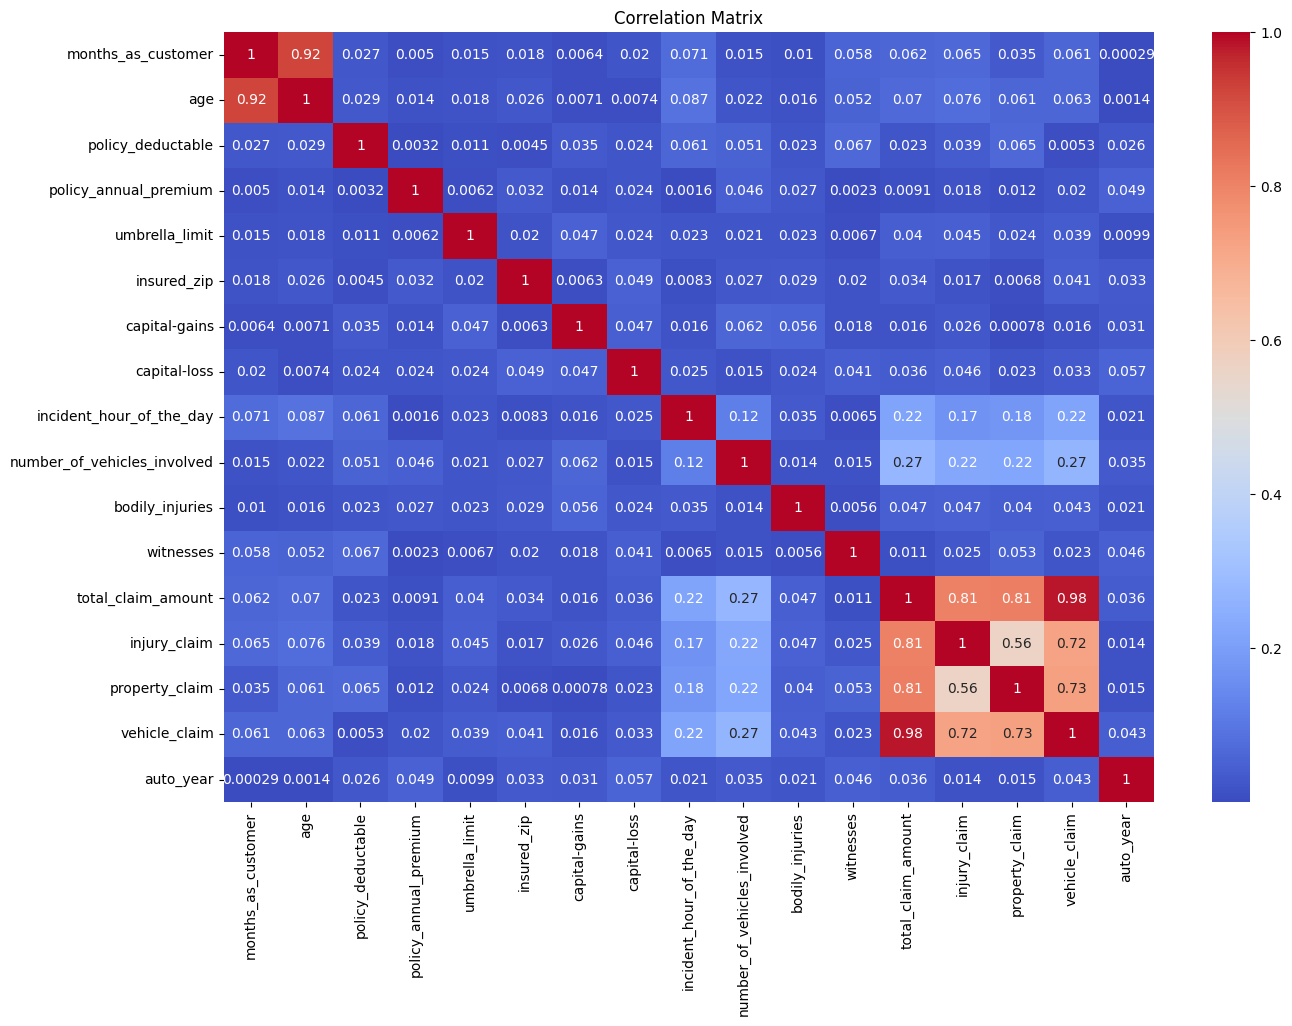

Multicollinear columns: {'property_claim', 'total_claim_amount', 'vehicle_claim', 'months_as_customer', 'injury_claim', 'age'}


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def check_multicollinearity(df, threshold=0.8):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features



multicollinear_cols = check_multicollinearity(df)
print("Multicollinear columns:", multicollinear_cols)

### Reports

* We can remove those columns which are multicorrelated 

In [25]:
## remove few features 

df = df.drop(columns=['months_as_customer', 'property_claim', 'age', 'policy_csl'], axis=1)

df.head(3)

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,...,1,2,YES,71610,6510,52080,Saab,92x,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,0,0,?,5070,780,3510,Mercedes,E400,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,...,2,3,NO,34650,7700,23100,Dodge,RAM,2007,N


In [26]:
df.isnull().sum()

policy_state                    0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
vehicle_claim                   0
auto_make     

In [27]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [28]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

In [29]:
## Check for missing values

df.isnull().sum()

policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
vehicle_claim                  0
auto_make                      0
auto_model

There are no missing values we can proceed with the encoding

In [30]:
final_df = df.copy()

final_df.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,...,1,2,YES,71610,6510,52080,Saab,92x,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,0,0,?,5070,780,3510,Mercedes,E400,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,...,2,3,NO,34650,7700,23100,Dodge,RAM,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,...,1,2,NO,63400,6340,50720,Chevrolet,Tahoe,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,...,0,1,NO,6500,1300,4550,Accura,RSX,2009,N


In [31]:
colum_name =[]
unique_value=[]

# Iterate through the columns
for col in final_df:
    if final_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(final_df[col].nunique())
        
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
13,incident_location,1000
6,incident_date,60
17,auto_model,39
4,insured_hobbies,20
3,insured_occupation,14
16,auto_make,14
2,insured_education_level,7
11,incident_state,7
12,incident_city,7
5,insured_relationship,6


In [32]:
## Let's drop those columns which have more unique values than 7

final_df.drop(columns=['incident_location', 'incident_date', 'auto_model', 'insured_hobbies',
                                 'insured_occupation'], axis=1, inplace=True)

In [33]:
final_df.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,YES,1,2,YES,71610,6510,52080,Saab,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,?,0,0,?,5070,780,3510,Mercedes,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,NO,2,3,NO,34650,7700,23100,Dodge,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,?,1,2,NO,63400,6340,50720,Chevrolet,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,NO,0,1,NO,6500,1300,4550,Accura,2009,N


In [34]:
%pwd

'd:\\collab_projects\\insurance_claims\\notebook'

In [35]:
os.chdir("./data/")

In [38]:
final_df.to_csv('insurance_data.csv', index=False)

### Check for Outliers and treat them

In [41]:
from scipy.stats import zscore

# Assuming you have a DataFrame named 'data'

# Create a new DataFrame to store the cleaned data
cleaned_data = final_df.copy()

# Check and treat outliers in numerical columns
numerical_cols = cleaned_data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    # Calculate the z-scores for each value in the column
    z_scores = zscore(cleaned_data[col])

    # Define a threshold for identifying outliers
    threshold = 3

    # Find the indices of outliers
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

    if len(outlier_indices) > 0:
        print(f"Outliers found in column '{col}':")
        print(cleaned_data.loc[outlier_indices, col])
        
        # Perform outlier treatment (e.g., replacing with median value)
        median_value = cleaned_data[col].median()
        cleaned_data.loc[outlier_indices, col] = median_value
        print("Outliers treated.\n")

# Check and treat outliers in categorical columns
categorical_cols = cleaned_data.select_dtypes(include='object').columns

for col in categorical_cols:
    # Calculate the value counts for each unique value in the column
    value_counts = cleaned_data[col].value_counts()

    # Define a threshold for identifying rare categories as outliers
    threshold = 10

    # Find the categories with counts less than the threshold
    outlier_categories = value_counts[value_counts < threshold].index

    if len(outlier_categories) > 0:
        print(f"Outliers found in column '{col}':")
        print(outlier_categories)
        
        # Perform outlier treatment (e.g., replacing with most frequent category)
        most_frequent_category = cleaned_data[col].mode().values[0]
        cleaned_data.loc[cleaned_data[col].isin(outlier_categories), col] = most_frequent_category
        print("Outliers treated.\n")

# Save the cleaned data into a new DataFrame or CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)


In [43]:
cleaned_data.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,YES,1,2,YES,71610,6510,52080,Saab,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,?,0,0,?,5070,780,3510,Mercedes,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,NO,2,3,NO,34650,7700,23100,Dodge,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,?,1,2,NO,63400,6340,50720,Chevrolet,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,NO,0,1,NO,6500,1300,4550,Accura,2009,N
